<a href="https://colab.research.google.com/github/Rathorerishabh/PRODIGY_DS_01/blob/main/Diabetes_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
!pip install dotdict

  Preparing metadata (setup.py) ... done
  Created wheel for dotdict: filename=dotdict-0.1-py3-none-any.whl size=1624 sha256=2aeffcdde5c16838302c4c752e3e41b178e15d2b6886191cedc0a64323e14c77
  Stored in directory: /root/.cache/pip/wheels/66/a8/a1/56f81e629a2bb4b514c0ff9624a3e9931d74d27fe35aedfbac
Successfully built dotdict


In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [6]:
df=pd.concat([X,y],axis=1)

In [7]:
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [8]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


<Axes: ylabel='MentHlth'>

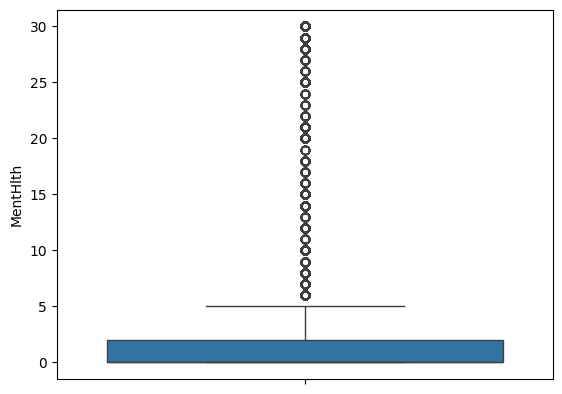

In [9]:
sns.boxplot(y="MentHlth", data=df)

In [10]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [11]:
df.corr()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,...,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235,0.263129
HighChol,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,...,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459,0.200276
CholCheck,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,...,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259,0.064761
BMI,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,...,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069,0.216843
Smoker,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,...,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937,0.060789
Stroke,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,...,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599,0.105816
HeartDiseaseorAttack,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,...,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011,0.177282
PhysActivity,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,...,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539,-0.118133
Fruits,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,...,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929,-0.040779
Veggies,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,...,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087,-0.056584


In [12]:
x=df.drop("Diabetes_binary",axis=1)
y=df["Diabetes_binary"]

In [13]:
y

0         0
1         0
2         0
3         0
4         0
         ..
253675    0
253676    1
253677    0
253678    0
253679    1
Name: Diabetes_binary, Length: 253680, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [15]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

array([0.04543525, 0.03089819, 0.03944616, 0.03523357, 0.01455595,
       0.00557863, 0.01293057, 0.03366477, 0.02387642, 0.02967231,
       0.0029499 , 0.03471994, 0.00091966, 0.05136962, 0.00334096,
       0.01148558, 0.02096713, 0.01440768, 0.02669378, 0.01896358,
       0.02770737])

In [16]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

GenHlth                 0.051370
HighBP                  0.045435
CholCheck               0.039446
BMI                     0.035234
AnyHealthcare           0.034720
PhysActivity            0.033665
HighChol                0.030898
Veggies                 0.029672
Income                  0.027707
Age                     0.026694
Fruits                  0.023876
DiffWalk                0.020967
Education               0.018964
Smoker                  0.014556
Sex                     0.014408
HeartDiseaseorAttack    0.012931
PhysHlth                0.011486
Stroke                  0.005579
MentHlth                0.003341
HvyAlcoholConsump       0.002950
NoDocbcCost             0.000920
dtype: float64

In [17]:
from sklearn.feature_selection import SelectKBest
sel_fiv=SelectKBest(mutual_info_classif,k=15)
sel_fiv.fit(x_train,y_train)
x_train.columns[sel_fiv.get_support()]

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity',
       'Fruits', 'Veggies', 'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income'],
      dtype='object')

In [18]:
df1=df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity',
       'Fruits', 'Veggies', 'AnyHealthcare', 'GenHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income','Diabetes_binary']]

In [19]:
df1

,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,AnyHealthcare,GenHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,1,1,5,1,0,9,4,3,0
1,0,0,0,25,1,1,0,0,0,3,0,0,7,6,1,0
2,1,1,1,28,0,0,1,0,1,5,1,0,9,4,8,0
3,1,0,1,27,0,1,1,1,1,2,0,0,11,3,6,0
4,1,1,1,24,0,1,1,1,1,2,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,1,1,1,3,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,1,4,1,0,11,2,4,1
253677,0,0,1,28,0,1,1,0,1,1,0,0,2,5,2,0
253678,1,0,1,23,0,0,1,1,1,3,0,1,7,5,1,0


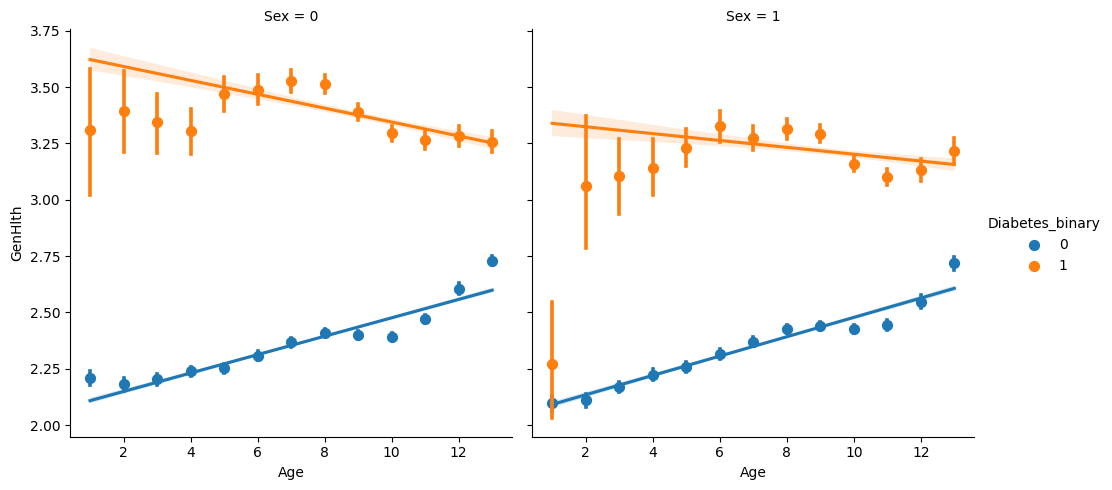

In [20]:
sns.lmplot(data=df1, y="GenHlth", x="Age", hue="Diabetes_binary", x_bins=1000,col="Sex")

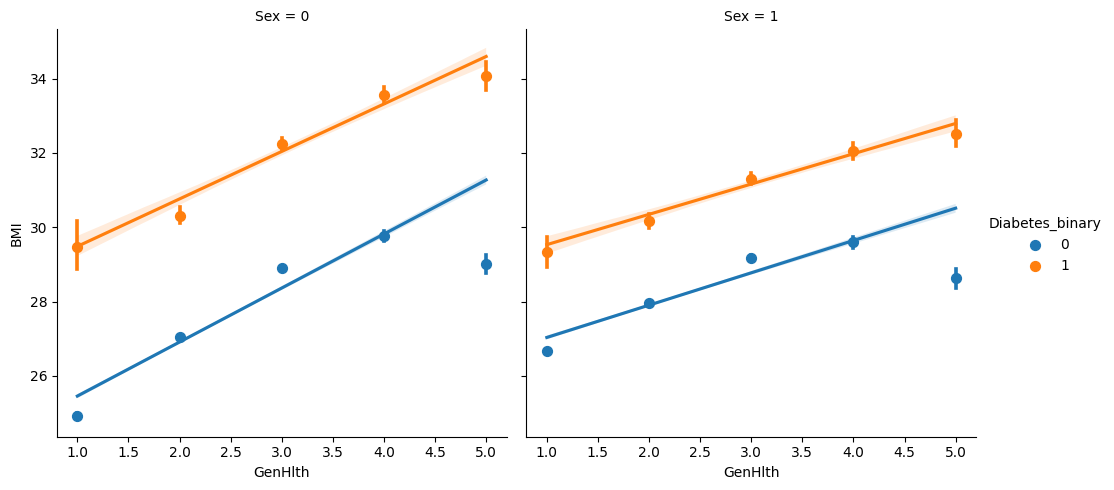

In [21]:
sns.lmplot(data=df1, x="GenHlth", y="BMI", hue="Diabetes_binary", x_bins=1000,col="Sex")

<ipython-input-22-924d0f792aa7>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:orange'` for the same effect.

  sns.barplot(y="Sex",hue="Smoker",data=df1,color="orange")


<Axes: ylabel='Sex'>

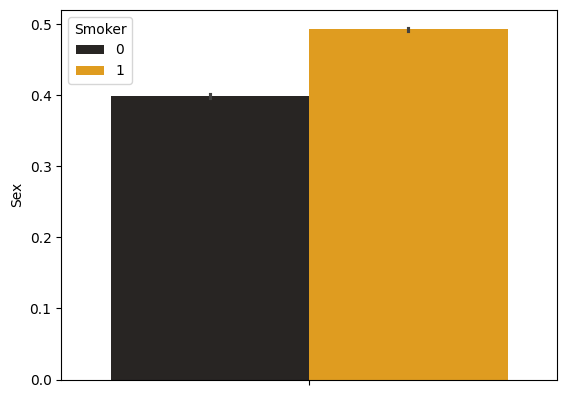

In [22]:
sns.barplot(y="Sex",hue="Smoker",data=df1,color="orange")

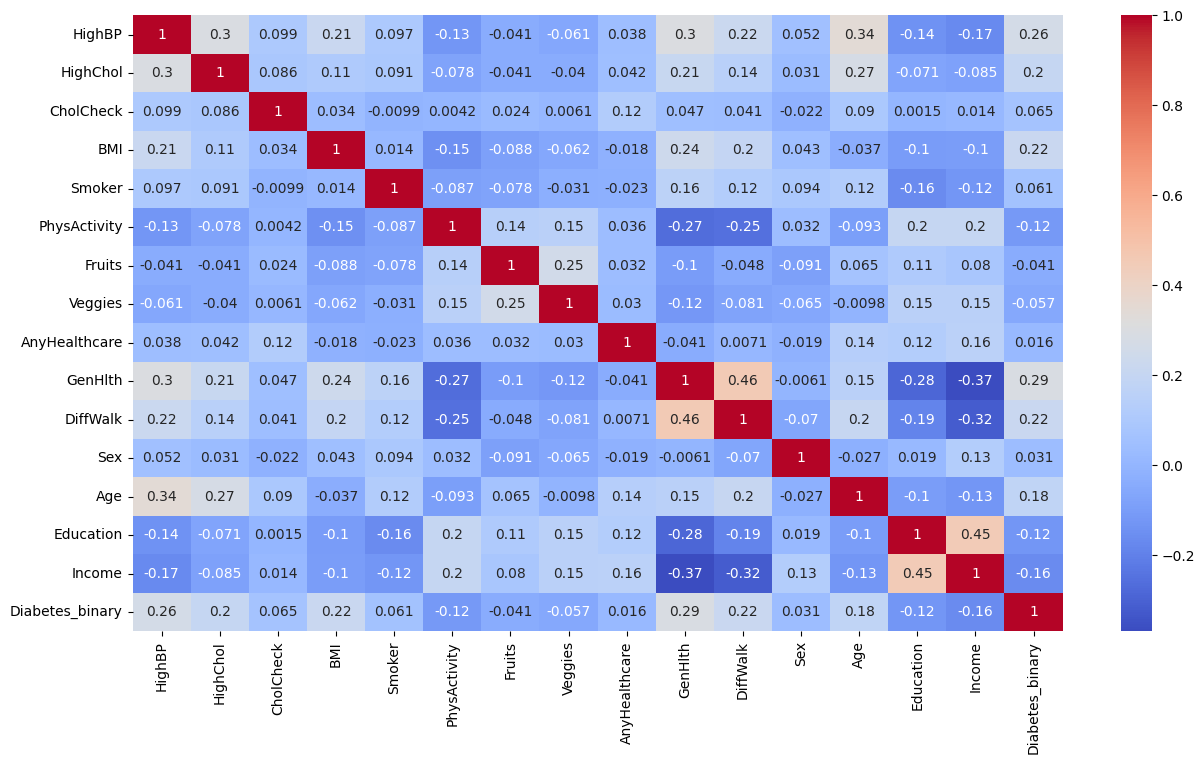

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")  # Adjust cmap for color scheme
plt.show()

In [24]:
x1=df1.drop("Diabetes_binary",axis=1)
y1=df1["Diabetes_binary"]

In [25]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.25,random_state=67)

In [26]:
x1_train.shape

(190260, 15)

In [27]:
y1_train.shape

(190260,)

In [28]:
df1["Diabetes_binary"].value_counts()

0    218334
1     35346
Name: Diabetes_binary, dtype: int64

In [29]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x1_train)
x1_train = norm.transform(x1_train)
x1_test = norm.transform(x1_test)

In [30]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x1_train, y1_train)
y_pred = dt_classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y1_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8026490066225166
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     54519
           1       0.30      0.31      0.30      8901

    accuracy                           0.80     63420
   macro avg       0.59      0.60      0.59     63420
weighted avg       0.80      0.80      0.80     63420



In [31]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x1_train, y1_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y1_train,
                             model.predict(x1_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y1_test,
                             model.predict(x1_test))*100)

Training Accuracy :  98.33806370230211
Validation Accuracy :  80.26490066225166


In [32]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1, criterion='log_loss', bootstrap=True, oob_score=True, verbose=1)
rf_classifier.fit(x1_train, y1_train)
y_pred = rf_classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y1_test, y_pred)
print("Classification Report:")
print(report)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   11.7s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.3s


Accuracy: 0.8507095553453169
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     54519
           1       0.43      0.20      0.27      8901

    accuracy                           0.85     63420
   macro avg       0.66      0.58      0.60     63420
weighted avg       0.82      0.85      0.83     63420



In [33]:
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(x1_train, y1_train)
y_pred = logistic_model.predict(x1_test)

accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y1_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.86280353200883
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     54519
           1       0.54      0.15      0.23      8901

    accuracy                           0.86     63420
   macro avg       0.71      0.56      0.58     63420
weighted avg       0.83      0.86      0.83     63420



In [34]:
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x1_train, y1_train)
y_pred = gb_classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y1_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8652633238725954
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     54519
           1       0.57      0.16      0.25      8901

    accuracy                           0.87     63420
   macro avg       0.72      0.57      0.59     63420
weighted avg       0.83      0.87      0.83     63420



In [35]:
model = GradientBoostingClassifier()
model.fit(x1_train, y1_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y1_train,
                             model.predict(x1_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(x1_test))*100)

Training Accuracy :  86.64721959423946
Validation Accuracy :  82.96121097445601


In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier.fit(x1_train, y1_train)
y_pred = knn_classifier.predict(x1_test)

accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y1_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8572374645222327
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     54519
           1       0.46      0.11      0.17      8901

    accuracy                           0.86     63420
   macro avg       0.67      0.54      0.55     63420
weighted avg       0.81      0.86      0.82     63420



In [37]:
import xgboost as xgb
import lightgbm as lgb

In [38]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred_xgb = model_xgb.predict(x1_test)
accuracy_xgb = accuracy_score(y1_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost Classification Report:")
print(classification_report(y1_test, y_pred_xgb))

XGBoost Accuracy: 0.8653894670450962
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     54519
           1       0.58      0.15      0.24      8901

    accuracy                           0.87     63420
   macro avg       0.73      0.57      0.59     63420
weighted avg       0.83      0.87      0.83     63420



In [40]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(x1_train, y1_train)

[LightGBM] [Info] Number of positive: 26445, number of negative: 163815
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 190260, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.138994 -> initscore=-1.823671
[LightGBM] [Info] Start training from score -1.823671


LGBMClassifier()

In [41]:
y_pred_lgb = model_lgb.predict(x1_test)
accuracy_lgb = accuracy_score(y1_test, y_pred_lgb)
print("LightGBM Accuracy:", accuracy_lgb)
print("LightGBM Classification Report:")
print(classification_report(y1_test, y_pred_lgb))

LightGBM Accuracy: 0.8660201829076001
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     54519
           1       0.59      0.15      0.24      8901

    accuracy                           0.87     63420
   macro avg       0.73      0.57      0.58     63420
weighted avg       0.84      0.87      0.83     63420



In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,sampling_strategy=1)
X_resampled, y_resampled = smote.fit_resample(x1_train, y1_train)

In [43]:
model_xgb_resampled = xgb.XGBClassifier()
model_xgb_resampled.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
y_pred_xgb_final = model_xgb_resampled.predict(x1_test)
accuracy_xgb_final = accuracy_score(y1_test, y_pred_xgb_final)
print("Final XGBoost Accuracy:", accuracy_xgb_final)
print("Final XGBoost Classification Report:")
print(classification_report(y1_test, y_pred_xgb_final))

Final XGBoost Accuracy: 0.86280353200883
Final XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     54519
           1       0.53      0.23      0.32      8901

    accuracy                           0.86     63420
   macro avg       0.71      0.60      0.62     63420
weighted avg       0.83      0.86      0.84     63420

